<a href="https://colab.research.google.com/github/upputurirajkumar/codEvo-solutions-Task3/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 2s 0us/step


In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)


In [5]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model.add(Dense(10, activation='softmax'))


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(train_generator, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
782/782 [==============================] - 147s 186ms/step - loss: 1.6182 - accuracy: 0.4067 - val_loss: 1.2465 - val_accuracy: 0.5469
Epoch 2/50
782/782 [==============================] - 148s 189ms/step - loss: 1.2525 - accuracy: 0.5508 - val_loss: 1.0180 - val_accuracy: 0.6371
Epoch 3/50
782/782 [==============================] - 148s 189ms/step - loss: 1.0909 - accuracy: 0.6132 - val_loss: 0.9794 - val_accuracy: 0.6583
Epoch 4/50
782/782 [==============================] - 147s 188ms/step - loss: 1.0048 - accuracy: 0.6456 - val_loss: 0.8856 - val_accuracy: 0.6940
Epoch 5/50
782/782 [==============================] - 145s 185ms/step - loss: 0.9398 - accuracy: 0.6689 - val_loss: 0.8542 - val_accuracy: 0.7007
Epoch 6/50
782/782 [==============================] - 147s 188ms/step - loss: 0.8926 - accuracy: 0.6873 - val_loss: 0.7914 - val_accuracy: 0.7216
Epoch 7/50
782/782 [==============================] - 149s 191ms/step - loss: 0.8599 - accuracy: 0.6986 - val_loss: 0.8322 -

In [8]:
model.save_weights('cnn_cifar10_weights.h5')


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Accuracy
acc_score = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy Score: {acc_score}")


313/313 [==============================] - 9s 30ms/step - loss: 0.5552 - accuracy: 0.8187
Test accuracy: 0.8187000155448914
313/313 [==============================] - 8s 25ms/step
Accuracy Score: 0.8187


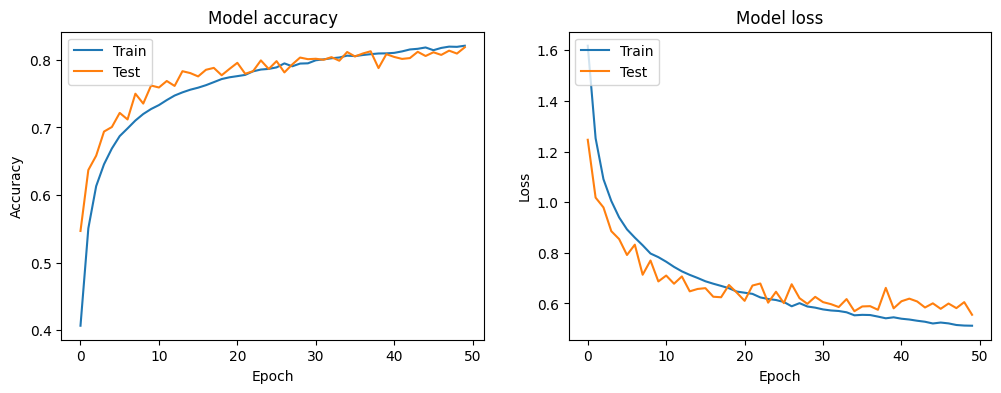

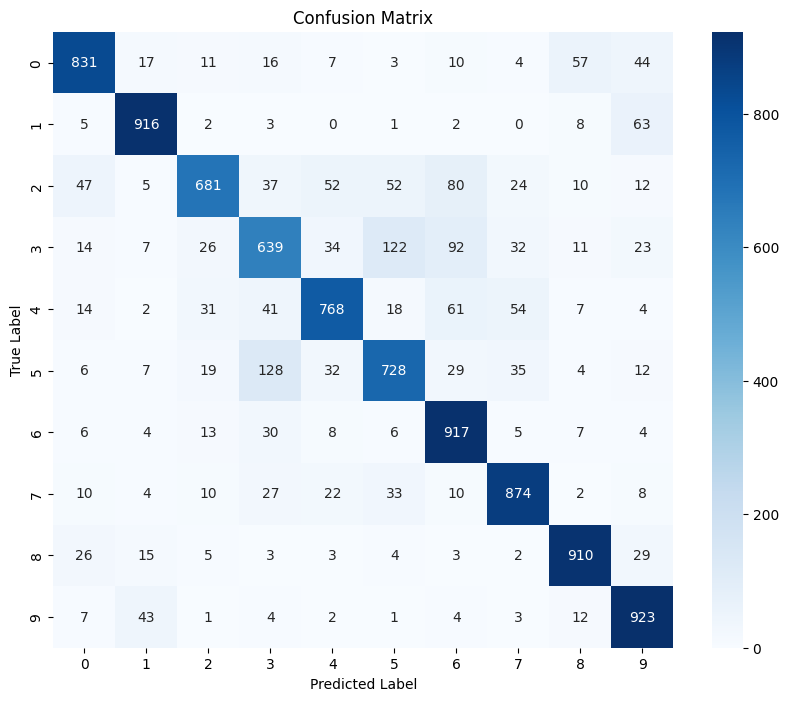

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
